# Assignment 2 specification

The purpose of this assignment is to analyse the Bike Sharing Dataset hosted on the UCI repository of datasets.

The dataset is provided with this notebook as a zip file.

There are two related datasets in the zip file: one aggregated by day, and the other aggregated by hour.

They represent the number of bikes that were shared/hired in Washington over that time period, together with the factors that are believed to predict the demand for such bikes.

They include the time unit and various measures of the weather etc. (in terms of temperature, humidity and wind-speed). More description can be found [here](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).

You are asked to

1. Read the _hourly_ data and split into training and test data __[5 marks]__
2. For the training data only, use exploratory data analysis to learn about the data and to indicate how to build a model __[15 marks]__
3. Using a forward selection approach, build a regression model that offers the best performance, using a machine learning measure (prediction accuracy on the test data) __[30 marks]__
   - You need to pay particular attention to the regression model assumptions
   - For best performance, you will also need to perform feature engineering
     - modifying the existing features
     - transforming them
     - merging them
     - keeping feature correlation as low as possible
   - 10-fold cross-validation should be used to estimate the uncertainty in the fitted model parameters.
4. Which of the 3 target columns is easiest to predict accurately? __[5 marks]__
5. Using this "preferred target", derive a new target whose values are the grouped label (taking the values `Q1`, `Q2`, `Q3`, `Q4`) for demand in the quartiles (0 < demand <= 25th percentile of demand), (25th percentile of demand < demand <= 50th percentile of demand), .. You might find the [pandas quantile calculator](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html) convenient when computing the quartile end points (25th, 50th and 75th percentiles), and pandas filtering by rows  convenient for assigning the new labels. __[5 marks]__
6. Use _two_ classification procedures to predict these demand quartiles, repeating the forward selection procedure to find the best model for each, but this time focusing on classification accuracy on the test set as the measure of performance. Are the same features used in each of the two models? __[35 marks]__
7. Which of the two machine learning procedures (regression and classification) provides the highest prediction accuracy on the test set? Why is this? __[5 marks]__

# Task 1: Read the _hourly_ data and split into training and test data.

##Start of Answer 1##

# Imports

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Load Dataset

In [36]:
bikes_hourly = pd.read_csv("Bike-Sharing-Dataset/hour.csv")
print("Hourly", bikes_hourly.shape)
bikes_hourly.head(5)

Hourly (17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


 ## Check  if  there are any NaNs in dataset      

In [37]:
print("Missing Data : " + str(bikes_hourly.isnull().values.any()))

Missing Data : False


### Check dataframe data types

In [38]:
bikes_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### Data types are mostly numerical aside from the date however we wont be using the date so there is no need of changing it. Since there are no nulls and data types are ok there isnt anything to cleanup

 # Split into Test and Training

### Set Feautures and Targets

In [39]:
X, y = bikes_hourly.iloc[:,2:14], bikes_hourly.iloc[:,14:]
print("Features : ", X.columns.values)
print("Targets : ", y.columns.values)

Features :  ['season' 'yr' 'mnth' 'hr' 'holiday' 'weekday' 'workingday' 'weathersit'
 'temp' 'atemp' 'hum' 'windspeed']
Targets :  ['casual' 'registered' 'cnt']


### Split Data Into Train and Test 6:4

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=666)

##End of Answer 1##

# Task 2: For the training data only, use exploratory data analysis to learn about the data and to indicate how to build a model

##Start of Answer 2##

### Convert training data into dataframe

In [41]:
df_train = pd.DataFrame()
df_train=X_train.copy()
df_train = df_train.join(y_train.copy())

bikes_train = df_train.sort_values(by=['yr','mnth','weekday','hr'],ascending=True)

print("Size Before Split:", bikes_hourly.shape)
print("Size After Split:", bikes_train.shape)

bikes_train.head(5)

Size Before Split: (17379, 17)
Size After Split: (10427, 15)


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
641,1,0,1,0,0,0,0,1,0.16,0.1818,0.80,0.1045,0,33,33
24,1,0,1,0,0,0,0,2,0.46,0.4545,0.88,0.2985,4,13,17
185,1,0,1,0,0,0,0,1,0.10,0.0758,0.42,0.3881,1,24,25
642,1,0,1,1,0,0,0,1,0.14,0.2121,0.80,0.0000,7,22,29
349,1,0,1,1,0,0,0,1,0.26,0.2727,0.56,0.1343,4,19,23


<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

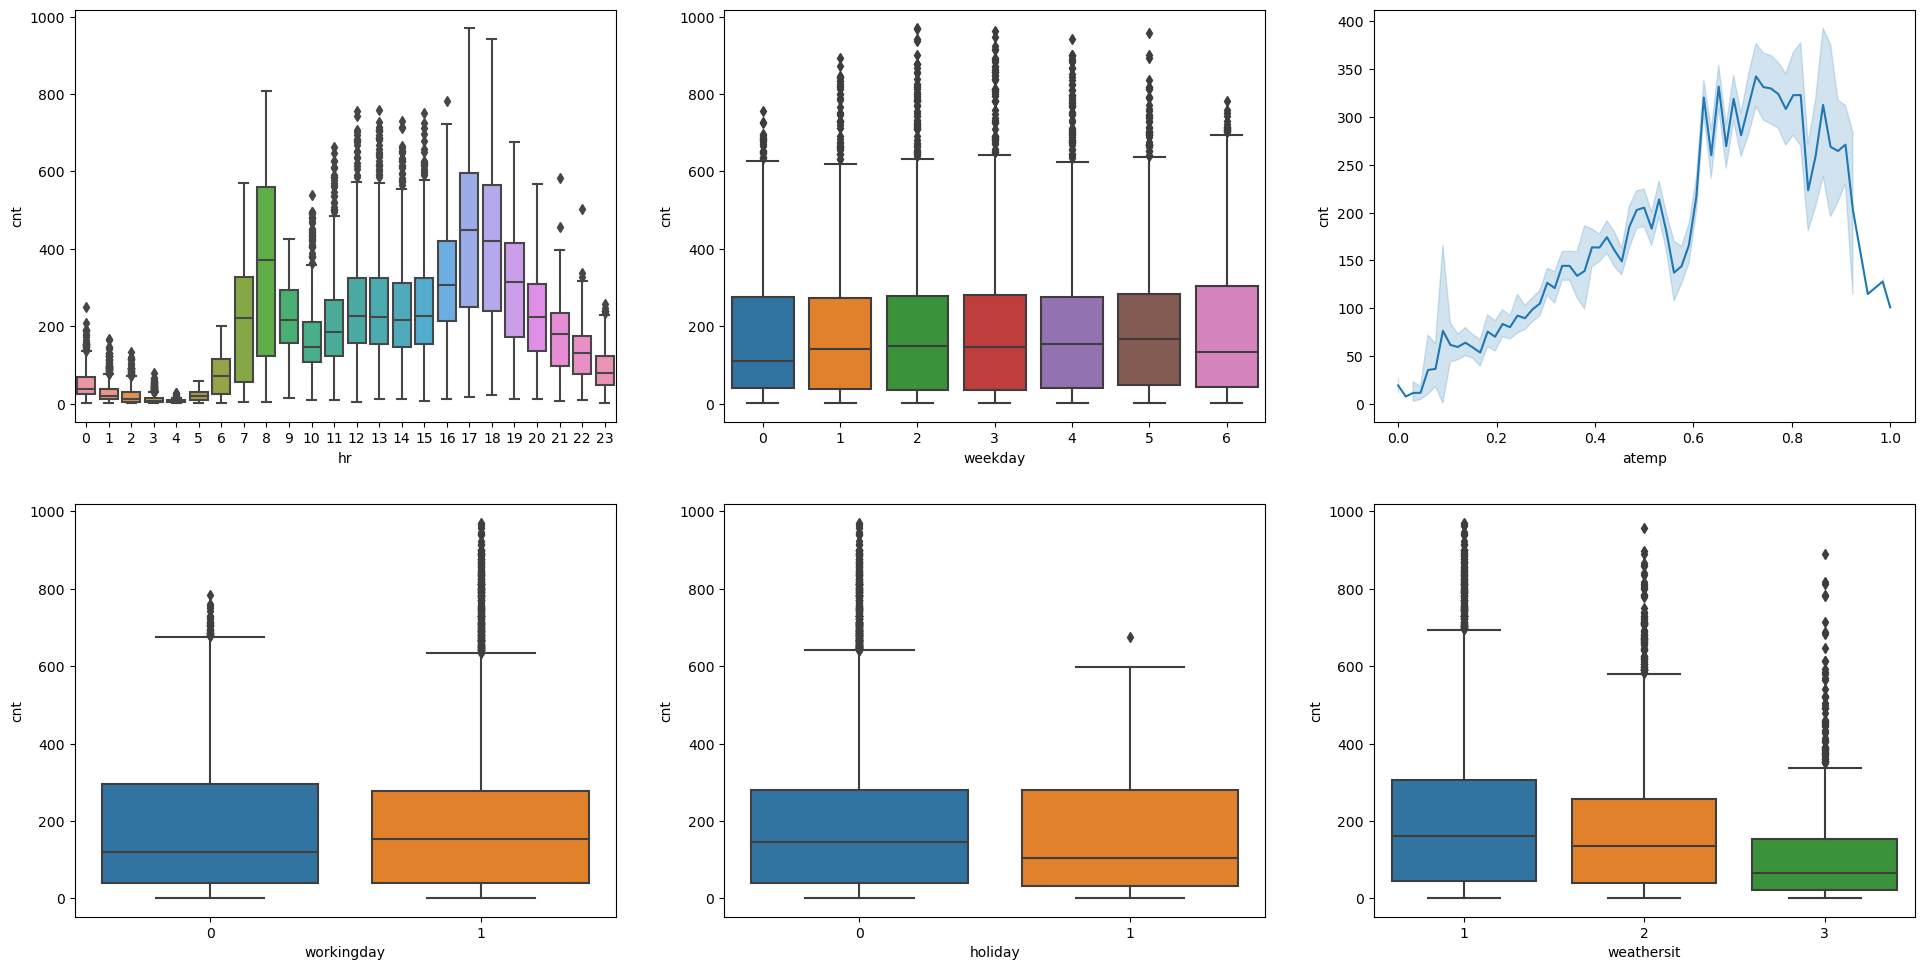

In [62]:
fig ,axes = plt.subplots(2, 3)

# set the spacing between subplots
plt.subplots_adjust(right=3, top=2)

sns.boxplot(data=bikes_train, x="hr", y="cnt", ax=axes[0,0])

sns.boxplot(data=bikes_train, x="weekday", y="cnt", ax=axes[0,1])

sns.lineplot(data=bikes_train, x="atemp", y="cnt", ax=axes[0,2])

sns.boxplot(data=bikes_train, x="workingday", y="cnt", ax=axes[1,0])

sns.boxplot(data=bikes_train, x="holiday", y="cnt", ax=axes[1,1])

sns.boxplot(data=bikes_train, x="weathersit", y="cnt", ax=axes[1,2])

-  From the boxplots we can see that the mean bikes rented per day is roughly the same during the week however it slightly decreases on weekends (0,6). 
- The night hours from 10pm-6am tend to have the lowest mean for bikes rented by the hour, the hihghest means are seen around the start and finish of busines hours ie ~8am and ~5pm, the mean then decreases for the duration of business dat ~10am to ~3pm however it is still higher then the night hours. 
- From the lineplot we can see that the average number of bikes rented increases with the temperature to a point and after a certain point it decreases significantly.
- From the holiday boxplot we can also see the the mean is slightly lower during holidays
- The weathersit or weathersitatuin also has a clear decrease of the average cnt as we move from 1 - 3 , this shows that more people rent bikes when the weather situatuion is clearer with fewerr clouds (1) when compared to misty conditions (2) and raining, snowing or thunderstorm conditions (3)

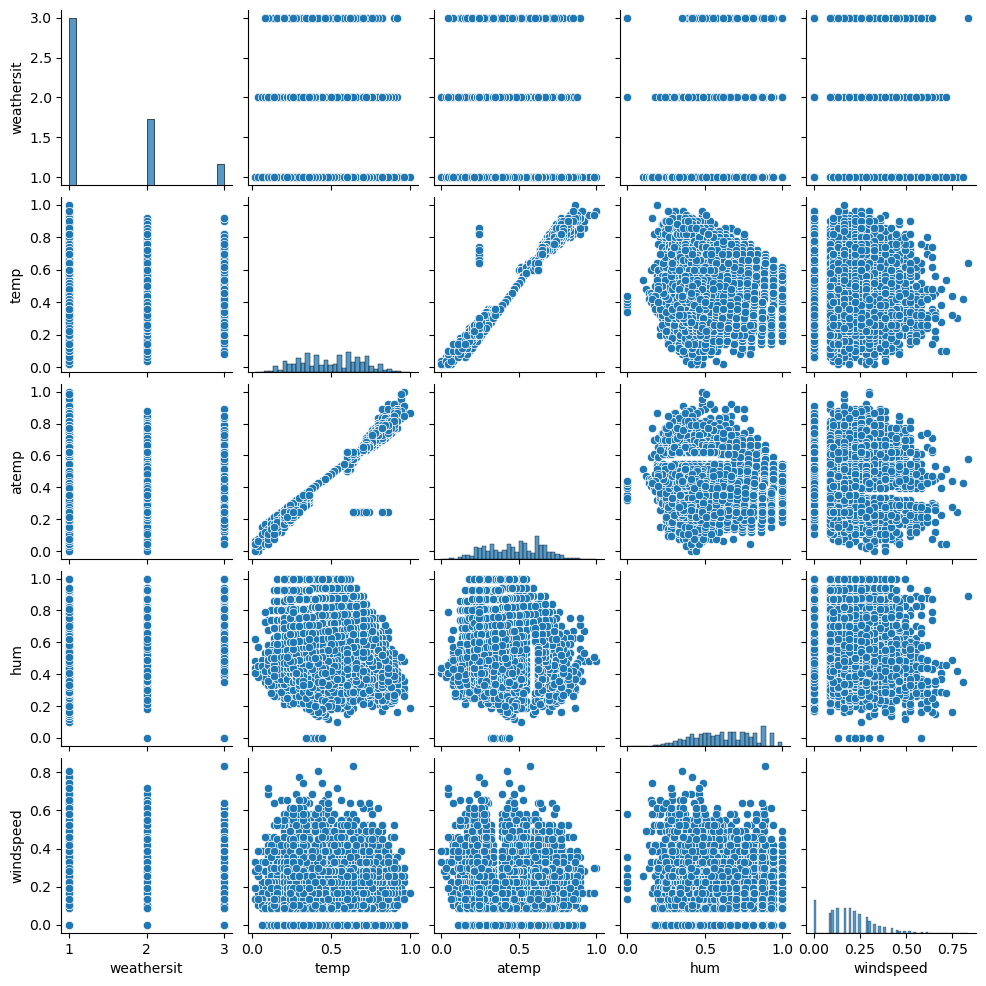

In [43]:
 sns.pairplot(bikes_train, vars=['weathersit', 'temp', 'atemp', 'hum', 'windspeed'], height=2)

#### From the pairplot we can see that there is a clear relationship between two of our feautures temp and atemp , this means we can drop one of these as they have a high corelation.

#### Using Spearmans and Pearsons Corelations to spot any more corelations between features and also to spot any features that might be good predictors for the target ie have lowcorrelation with other candidate predictors.

<AxesSubplot:title={'center':'Pearsons'}>

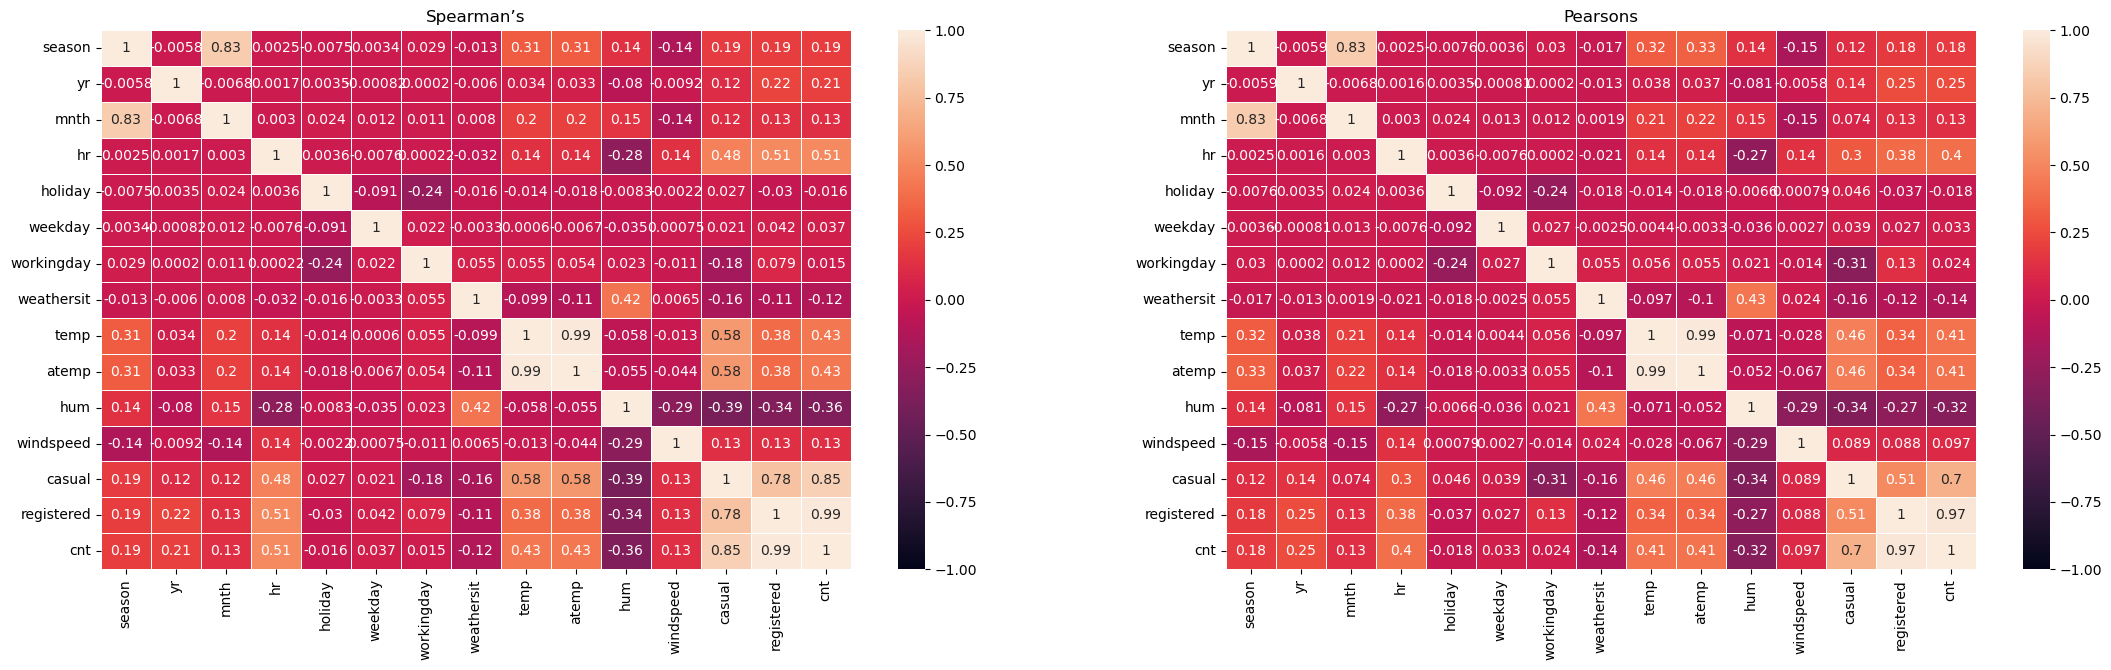

In [44]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 7))
plt.subplots_adjust(right=1.5)

columns = bikes_train.columns.values
SpearCorr = bikes_train[columns].corr(method='spearman')

ax1.set_title("Spearman’s")
sns.heatmap( SpearCorr, annot=True, vmin=-1 , vmax=1 , linewidths=0.5 , ax=ax1)

PearsonCorr = bikes_train[columns].corr()
ax2.set_title("Pearsons")
sns.heatmap(PearsonCorr, annot=True, vmin=-1 , vmax=1 , linewidths=0.5 , ax=ax2)

- The corleation heatmaps further show us that atemp and temp has a very high corelation so we will drop on of these, because they increase the standard error and variance which  make the solver’s job harder.
- Season and month have a high corelation aswell so once again we will remove one of these for the same reason explained above.
- We also see that registered, cnt and casual have a high corelation between eachother however there is no need to drop any of these as they are all targets.

### Dropping temp and season

In [45]:
# Drop from frame 
bikes_train = bikes_train.drop(['temp','season'], axis=1 )
print("Columns in dataframe", bikes_train.columns.values)

# Drop from predictors
X_train = X_train.drop(['temp','season'],axis=1)
print("Features:", X_train.columns.values)


Columns in dataframe ['yr' 'mnth' 'hr' 'holiday' 'weekday' 'workingday' 'weathersit' 'atemp'
 'hum' 'windspeed' 'casual' 'registered' 'cnt']
Features: ['yr' 'mnth' 'hr' 'holiday' 'weekday' 'workingday' 'weathersit' 'atemp'
 'hum' 'windspeed']


 - Decided to drop temp as atemp is the actual temperature felt on the day which might affect poeples choises for renting bikes more than the forecasted temp.
 - Decided to drop season over month as season is less specific than month

##End of Answer 2##

# Task 3: Using a forward selection approach, build a regression model that offers the best performance

##Start of Answer 3##

### Configure template model, so we an later configure it for sepcific fits

In [70]:
model = linear_model.LinearRegression()

### Check model fit of working day and bike rent count

In [71]:
model.fit(X[['workingday']], y[['cnt']])
[model.intercept_, model.coef_]

[array([181.40533188]), array([[11.80242202]])]

In [82]:
def findNextBestPredictor(X,y,foundPredictors):
    nP = X.shape[1] # number of columns in X
    allPredictors = list(X) # See https://stackoverflow.com/a/19483025
    predictorsToSearch = set(allPredictors) - set(foundPredictors)
    maxScore = 0 # can usually do better than this!
    for predictor in predictorsToSearch: # loop over all remaining columns (predictors) in X
        trialPredictors = set(foundPredictors)
        trialPredictors.add(predictor) # Add this predictor to the existing predictors
        XcolSubset = X.loc[:,list(trialPredictors)] # all rows and just the trial predictors
        model.fit(XcolSubset, y) # fit the model to y
        score = model.score(XcolSubset, y)
        if score > maxScore: # identify the largest score and its associated predictor
            maxScore = score
            bestPredictorFound = predictor

    return (maxScore, bestPredictorFound)

findNextBestPredictor(X_train, y_train['cnt'], list())

(0.16628941911237416, 'atemp')

In [83]:
nP = X.shape[1]
scores = [0]
foundPredictors = list()

for i in range(nP): # loop over all columns (predictors) in X
    (score, bestPredictorFound) = findNextBestPredictor(X_train, y_train['cnt'], foundPredictors)
    foundPredictors.append(bestPredictorFound)
    scores.append(score)
    print(foundPredictors, score)

['atemp'] 0.16628941911237416
['atemp', 'hr'] 0.28513316235153785
['atemp', 'hr', 'yr'] 0.3416392547790499
['atemp', 'hr', 'yr', 'hum'] 0.38079449356500616
['atemp', 'hr', 'yr', 'hum', 'mnth'] 0.3884081927374974
['atemp', 'hr', 'yr', 'hum', 'mnth', 'windspeed'] 0.3894652443323181
['atemp', 'hr', 'yr', 'hum', 'mnth', 'windspeed', 'weekday'] 0.3902173852634231
['atemp', 'hr', 'yr', 'hum', 'mnth', 'windspeed', 'weekday', 'holiday'] 0.3904515315625028
['atemp', 'hr', 'yr', 'hum', 'mnth', 'windspeed', 'weekday', 'holiday', 'weathersit'] 0.39054679962162553
['atemp', 'hr', 'yr', 'hum', 'mnth', 'windspeed', 'weekday', 'holiday', 'weathersit', 'workingday'] 0.3905856573274785


UnboundLocalError: local variable 'bestPredictorFound' referenced before assignment

In [84]:
nP = X.shape[1]
scores = [0]
foundPredictors = list()

for i in range(nP): # loop over all columns (predictors) in X
    (score, bestPredictorFound) = findNextBestPredictor(X_train, y_train['registered'], foundPredictors)
    foundPredictors.append(bestPredictorFound)
    scores.append(score)
    print(foundPredictors, score)

['hr'] 0.1436530402879156
['hr', 'atemp'] 0.22783963904118343
['hr', 'atemp', 'yr'] 0.28728350752049936
['hr', 'atemp', 'yr', 'hum'] 0.31063038702631507
['hr', 'atemp', 'yr', 'hum', 'workingday'] 0.3246864167488397
['hr', 'atemp', 'yr', 'hum', 'workingday', 'mnth'] 0.33400564191612214
['hr', 'atemp', 'yr', 'hum', 'workingday', 'mnth', 'windspeed'] 0.33507292941121536
['hr', 'atemp', 'yr', 'hum', 'workingday', 'mnth', 'windspeed', 'weekday'] 0.3354450269644811
['hr', 'atemp', 'yr', 'hum', 'workingday', 'mnth', 'windspeed', 'weekday', 'weathersit'] 0.3358057569734101
['hr', 'atemp', 'yr', 'hum', 'workingday', 'mnth', 'windspeed', 'weekday', 'weathersit', 'holiday'] 0.3358649513276649


UnboundLocalError: local variable 'bestPredictorFound' referenced before assignment

In [74]:
nP = X.shape[1]
scores = [0]
foundPredictors = list()

for i in range(nP): # loop over all columns (predictors) in X
    (score, bestPredictorFound) = findNextBestPredictor(X_train, y_train['casual'], foundPredictors)
    foundPredictors.append(bestPredictorFound)
    scores.append(score)
    print(foundPredictors, score)

['atemp'] 0.20920439449359363
['atemp', 'workingday'] 0.31915666362082507
['atemp', 'workingday', 'hum'] 0.41711807326799655
['atemp', 'workingday', 'hum', 'hr'] 0.44152118173746147
['atemp', 'workingday', 'hum', 'hr', 'yr'] 0.45256206332282833
['atemp', 'workingday', 'hum', 'hr', 'yr', 'weekday'] 0.45422670219636785
['atemp', 'workingday', 'hum', 'hr', 'yr', 'weekday', 'holiday'] 0.4548560075957885
['atemp', 'workingday', 'hum', 'hr', 'yr', 'weekday', 'holiday', 'mnth'] 0.45550508005675516
['atemp', 'workingday', 'hum', 'hr', 'yr', 'weekday', 'holiday', 'mnth', 'weathersit'] 0.45606094819846943
['atemp', 'workingday', 'hum', 'hr', 'yr', 'weekday', 'holiday', 'mnth', 'weathersit', 'windspeed'] 0.45632667737789445


UnboundLocalError: local variable 'bestPredictorFound' referenced before assignment

##End of Answer 3##

# Task 4: Which of the 3 target columns is easiest to predict accurately?

##Start of Answer 4##

##End of Answer 4##

# Task 5: Using this "preferred target", derive a new target whose values are the grouped label

##Start of Answer 5##

##End of Answer 5##

# Task 6: Use _two_ classification procedures to predict these demand quartiles

##Start of Answer 6

##End of Answer 6##

# Task 7: Which of the two machine learning procedures provides the highest prediction accuracy on the test set?

##Start of Answer 7

##End of Answer 7##